<a href="https://colab.research.google.com/github/Rizki-132/Allmateri/blob/main/CLASIFICATION_KNN_K_Nearest_Neighbours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sampel Dataset

In [3]:
import pandas as pd

sensus = {
    'Tinggi' : [158, 170, 183, 191, 155, 163, 180, 158, 178],
    'Berat' : [64, 86, 84, 80, 49, 59, 67, 54, 67],
    'jk' : [
        'pria', 'pria', 'pria', 'pria', 'wanita', 'wanita', 'wanita', 'wanita', 'wanita'
    ]
}

sensus_df = pd.DataFrame(sensus)

sensus_df

,Tinggi,Berat,jk
0,158,64,pria
1,170,86,pria
2,183,84,pria
3,191,80,pria
4,155,49,wanita
5,163,59,wanita
6,180,67,wanita
7,158,54,wanita
8,178,67,wanita


# Visualisasi Data

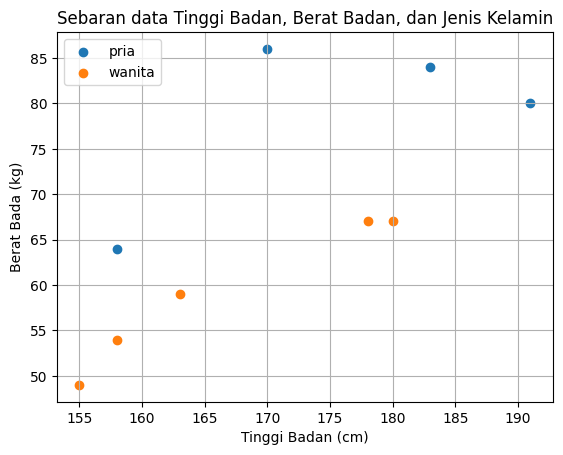

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for jk, d in sensus_df.groupby('jk'):
  ax.scatter(d['Tinggi'], d['Berat'], label=jk)

plt.legend(loc='upper left')
plt.title('Sebaran data Tinggi Badan, Berat Badan, dan Jenis Kelamin')
plt.xlabel('Tinggi Badan (cm)')
plt.ylabel('Berat Bada (kg)')
plt.grid(True)
plt.show()

# Prosessing Dataset

In [5]:
import numpy as np

X_train = np.array(sensus_df[['Tinggi', 'Berat']])
y_train = np.array(sensus_df['jk'])

print(f'X Train :\n{X_train}\n')
print(f'y train : {y_train}')

X Train :
[[158  64]
 [170  86]
 [183  84]
 [191  80]
 [155  49]
 [163  59]
 [180  67]
 [158  54]
 [178  67]]

y train : ['pria' 'pria' 'pria' 'pria' 'wanita' 'wanita' 'wanita' 'wanita' 'wanita']


In [8]:
#LabelBinarizer untuk mengkonversi nilai string menjadi nuberik biner
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
print(f'y_train:\n{y_train}')

y_train:
[[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]]


In [7]:
y_train = y_train.flatten()
print(f'y_train : {y_train}')

y_train : [0 0 0 0 1 1 1 1 1]


# Training KNN Clasification Model

In [9]:
from sklearn.neighbors import KNeighborsClassifier

k = 3
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

# Prediksi Jenis Kelamin

In [11]:
tinggi_badan = 155
berat_badan = 70
X_new = np.array([tinggi_badan, berat_badan]).reshape(1, -1)
X_new

array([[155,  70]])

In [12]:
y_new = model.predict(X_new)
y_new

array([1])

In [13]:
lb.inverse_transform(y_new)

array([1])